In [28]:
import glob
import pandas as pd
import numpy as np
import os
import csv
import sys

import random

In [2]:
#Read CSV file containing the people from the North East of England (output from SPENSER_notebook_6)
df_persons_NE_inactive_5categories_export_20220304_correct_dir = r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\economic_activity\Inactive_categories\Chosen_ones' # use your path
df_persons_NE_inactive_5categories_export_20220304_correct_dir_file = os.path.join(df_persons_NE_inactive_5categories_export_20220304_correct_dir, "df_persons_NE_inactive_5categories_export_20220304_correct.csv")
df_persons_NE_inactive_5categories = pd.read_csv(df_persons_NE_inactive_5categories_export_20220304_correct_dir_file, index_col=None, header=0)


## Income for inactive people will be assigned based on statistical data

## Retired:

In [17]:
# Select those inactive retired people:
df_retired = df_persons_NE_inactive_5categories.loc[df_persons_NE_inactive_5categories['Occupation'] == 'Retired']

Marital_status_list = ['Married', 'Couple']

# Those couples:
df_retired_couple = df_retired.loc[df_retired['Marital_status'].isin(Marital_status_list)]

# Those retired single male:
df_retired_single_male = df_retired.loc[(df_retired['Marital_status'] == 'Single') & (df_retired['Sex'] == 1)]

#Those retired single female:
df_retired_single_female = df_retired.loc[(df_retired['Marital_status'] == 'Single') & (df_retired['Sex'] == 2)]


#Income values to be assigned (income in £ per week 2018/19 prices):
##Pensioners' incomes series: An analysis of trends in pensioner incomes: 1994/95 to 2018/19
##https://www.gov.uk/government/statistics/pensioners-incomes-series-financial-year-2018-to-2019
annual_gross_couple_2018_2019 = int(674 * 52)
annual_gross_single_male_2018_2019 = int(425.31 * 52)
annual_gross_single_female_2018_2019 = int(315.80 * 52)


df_retired_couple['Income'] = int(annual_gross_couple_2018_2019/2)
df_retired_single_male['Income'] = annual_gross_single_male_2018_2019
df_retired_single_female['Income'] = annual_gross_single_female_2018_2019


df_retired__updated_all = (pd.concat([df_retired_couple, df_retired_single_male, df_retired_single_female]))


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [54]:
df_retired__updated_all['Income'].min()

16421

In [55]:
df_retired__updated_all['Income'].max()

22116

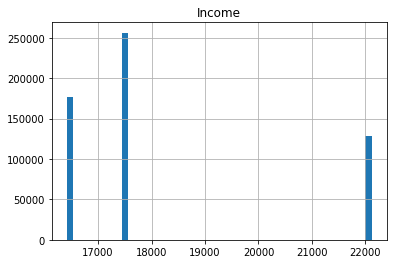

In [126]:
df_retired__updated_all.hist(column='Income', bins=50);

## Long term sick

In [47]:
# PIP
# You can get Personal Independence Payment (PIP) if all of the following apply to you:
## you’re 16 or over
## you have a long-term physical or mental health condition or disability
## you have difficulty doing certain everyday tasks or getting around
## you expect the difficulties to last for at least 12 months from when they started
# https://www.gov.uk/pip
pip_daily_living_part_income = [60, 89.60] #(£ weeklyly standard allowance)
pip_mobility_part_income = [23.70, 62.55]  #(£ weekly standard allowance)


# Universal Credit
##You may be able to get Universal Credit if you’re on a low income or need help with your living costs. You could be working (including self-employed or part time) or be out of work.
#To claim you must:
##live in the UK
##be aged 18 or over (there are some exceptions if you’re 16 to 17)
##be under State Pension age
##have £16,000 or less in money, savings and investments
## https://www.gov.uk/universal-credit

universal_credit_standard_single_under25 = 257.33 #(£ extra Monthly standard allowance)
universal_credit_standard_single_25plus = 324.84 #(£ extra Monthly standard allowance)
universal_credit_standard_couple_under25 = 403.93 #(£ extra Monthly standard allowance)
universal_credit_standard_couple_25plus = 509.91 #(£ extra Monthly standard allowance)

universal_credit_children_first = 282.50 #(£ extra Monthly)
universal_credit_children_second = 237.08 #(£ extra Monthly)

universal_credit_extra_disability_or_health_condition = 343.63 #(£ extra Monthly)





# Select people sick
df_sick = df_persons_NE_inactive_5categories.loc[df_persons_NE_inactive_5categories['Occupation'] == 'Long term sick']

df_sick['Income'] = 0


# Calculate the income for each sick person, based on their characteristics:
for idx_person, person in df_sick.iterrows():
    
    # If person is younger than 25:
    if person['Age'] < 25 :
        
        if person['Marital_status']  == 'Single':
        
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
                    
            # if the person (single and below 25 years) does not have any children:       
            else:
                pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                
                universal_credit_income = universal_credit_standard_single_under25 + universal_credit_extra_disability_or_health_condition
                
                income_total = 52 * pip_income + 12 *universal_credit_income
                
                df_sick.at[idx_person,'Income'] = int(income_total)
            
        
        # If person is below 25 and is married or couple:   
        else:
            
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)      
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
                    
            
            # if the person (married or couple and below 25 years) does not have any children:       
            else:
                pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_extra_disability_or_health_condition
                
                income_total = 52 * pip_income + 12 *universal_credit_income
                
                df_sick.at[idx_person,'Income'] = int(income_total)
            
     
    # If person is older or equal to 25:       
    else:
        
        if person['Marital_status']  == 'Single':
        
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
            
        
            # if the person (single and > 25 years) does not have any children:       
            else:
                
                pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                universal_credit_income = universal_credit_standard_single_25plus + universal_credit_extra_disability_or_health_condition
                
                income_total = 52 * pip_income + 12 *universal_credit_income
                
                df_sick.at[idx_person,'Income'] = int(income_total)
        
        # If person is above 25 and is married or couple:   
        else:
            
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_disability_or_health_condition
                
                    income_total = 52 * pip_income + 12 *universal_credit_income
                
                    df_sick.at[idx_person,'Income'] = int(income_total)
            
            
            # if the person (couple/married and > 25 years) does not have any children:       
            else:
                
                pip_income =  random.randrange(int(pip_daily_living_part_income[0]),int(pip_daily_living_part_income[1]), 1) + random.randrange(int(pip_mobility_part_income[0]),int(pip_mobility_part_income[1]), 1)
                universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_extra_disability_or_health_condition
                
                income_total = 52 * pip_income + 12 *universal_credit_income
                
                df_sick.at[idx_person,'Income'] = int(income_total)




C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
df_sick['Income'].min()

10863

In [52]:
df_sick['Income'].max()

24849

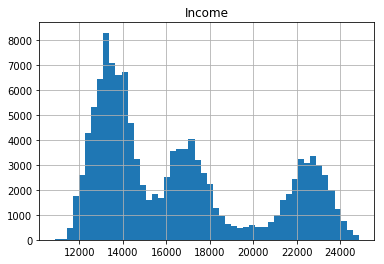

In [127]:
df_sick.hist(column='Income', bins=50);

# Looking after family / home

In [56]:
# Carers allowance
##You could get £67.60 a week if you care for someone at least 35 hours a week and they get certain benefits.
##You do not have to be related to, or live with, the person you care for.
##You do not get paid extra if you care for more than one person.
##If someone else also cares for the same person as you, only one of you can claim Carer’s Allowance.
## https://www.gov.uk/carers-allowance

carer_allowance = 67.60 #(£ weeklyly standard allowance)

# Universal Credit
##You may be able to get Universal Credit if you’re on a low income or need help with your living costs. You could be working (including self-employed or part time) or be out of work.
#To claim you must:
##live in the UK
##be aged 18 or over (there are some exceptions if you’re 16 to 17)
##be under State Pension age
##have £16,000 or less in money, savings and investments
## https://www.gov.uk/universal-credit

universal_credit_standard_single_under25 = 257.33 #(£ extra Monthly standard allowance)
universal_credit_standard_single_25plus = 324.84 #(£ extra Monthly standard allowance)
universal_credit_standard_couple_under25 = 403.93 #(£ extra Monthly standard allowance)
universal_credit_standard_couple_25plus = 509.91 #(£ extra Monthly standard allowance)

universal_credit_children_first = 282.50 #(£ extra Monthly)
universal_credit_children_second = 237.08 #(£ extra Monthly)

universal_credit_extra_care = 163.73 #(£ extra Monthly)






df_looking_after = df_persons_NE_inactive_5categories.loc[df_persons_NE_inactive_5categories['Occupation'] == 'Looking after home family']

df_looking_after['Income'] = 0


for idx_person, person in df_looking_after.iterrows():
    
    # If person is younger than 25:
    if person['Age'] < 25 :
        
        if person['Marital_status']  == 'Single':
        
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 *universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
                    
            # if the person (single and below 25 years) does not have any children:       
            else:
                
                universal_credit_income = universal_credit_standard_single_under25 + universal_credit_extra_care
                
                income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                df_looking_after.at[idx_person,'Income'] = int(income_total)
            
        
        # If person is below 25 and is married or couple:   
        else:
            
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
                    
            
            # if the person (married or couple and below 25 years) does not have any children:       
            else:
                
                universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_extra_care
                
                income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                df_looking_after.at[idx_person,'Income'] = int(income_total)
            
     
    # If person is older or equal to 25:       
    else:
        
        if person['Marital_status']  == 'Single':
        
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
            
        
            # if the person (single and > 25 years) does not have any children:       
            else:
                
                
                universal_credit_income = universal_credit_standard_single_25plus + universal_credit_extra_care
                
                income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                df_looking_after.at[idx_person,'Income'] = int(income_total)
        
        # If person is above 25 and is married or couple:   
        else:
            
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + universal_credit_children_second + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + (2* universal_credit_children_second) + universal_credit_extra_care
                
                    income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                    df_looking_after.at[idx_person,'Income'] = int(income_total)
            
            
            # if the person (couple/married and > 25 years) does not have any children:       
            else:
                
                
                universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_extra_care
                
                income_total = 52 * carer_allowance + 12 * universal_credit_income
                
                df_looking_after.at[idx_person,'Income'] = int(income_total)








C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
df_looking_after['Income'].min()

7903

In [59]:
df_looking_after['Income'].max()

18457

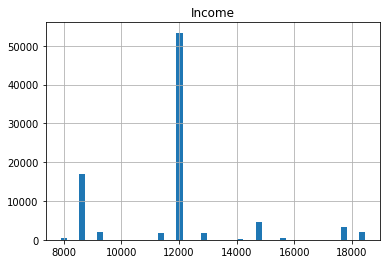

In [128]:
df_looking_after.hist(column='Income', bins=50);

## other

In [61]:
# Universal Credit
##You may be able to get Universal Credit if you’re on a low income or need help with your living costs. You could be working (including self-employed or part time) or be out of work.
#To claim you must:
##live in the UK
##be aged 18 or over (there are some exceptions if you’re 16 to 17)
##be under State Pension age
##have £16,000 or less in money, savings and investments
## https://www.gov.uk/universal-credit

universal_credit_standard_single_under25 = 257.33 #(£ extra Monthly standard allowance)
universal_credit_standard_single_25plus = 324.84 #(£ extra Monthly standard allowance)
universal_credit_standard_couple_under25 = 403.93 #(£ extra Monthly standard allowance)
universal_credit_standard_couple_25plus = 509.91 #(£ extra Monthly standard allowance)

universal_credit_children_first = 282.50 #(£ extra Monthly)
universal_credit_children_second = 237.08 #(£ extra Monthly)


df_Other = df_persons_NE_inactive_5categories.loc[df_persons_NE_inactive_5categories['Occupation'] == 'Other']

df_Other['Income'] = 0


for idx_person, person in df_Other.iterrows():
    
    # If person is younger than 25:
    if person['Age'] < 25 :
        
        if person['Marital_status']  == 'Single':
        
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + universal_credit_children_second
                
                    income_total =  12 *universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_under25 + universal_credit_children_first + (2* universal_credit_children_second) 
                
                    income_total =  12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
                    
            # if the person (single and below 25 years) does not have any children:       
            else:
                
                universal_credit_income = universal_credit_standard_single_under25 
                
                income_total = 12 * universal_credit_income
                
                df_Other.at[idx_person,'Income'] = int(income_total)
            
        
        # If person is below 25 and is married or couple:   
        else:
            
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + universal_credit_children_second 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_under25/2 + universal_credit_children_first + (2* universal_credit_children_second) 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
                    
            
            # if the person (married or couple and below 25 years) does not have any children:       
            else:
                
                universal_credit_income = universal_credit_standard_couple_under25/2 
                
                income_total = 12 * universal_credit_income
                
                df_Other.at[idx_person,'Income'] = int(income_total)
            
     
    # If person is older or equal to 25:       
    else:
        
        if person['Marital_status']  == 'Single':
        
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + universal_credit_children_second 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_single_25plus + universal_credit_children_first + (2* universal_credit_children_second) 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
            
        
            # if the person (single and > 25 years) does not have any children:       
            else:
                
                
                universal_credit_income = universal_credit_standard_single_25plus 
                
                income_total = 12 * universal_credit_income
                
                df_Other.at[idx_person,'Income'] = int(income_total)
        
        # If person is above 25 and is married or couple:   
        else:
            
            if person['Total_Children_in_household'] > 0:
            
                if person['Total_Children_in_household'] == 1:
                
                    
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
                
                
                if person['Total_Children_in_household'] == 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + universal_credit_children_second 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
            
            
                if person['Total_Children_in_household'] > 2:
                
                    
                    universal_credit_income = universal_credit_standard_couple_25plus/2 + universal_credit_children_first + (2* universal_credit_children_second) 
                
                    income_total = 12 * universal_credit_income
                
                    df_Other.at[idx_person,'Income'] = int(income_total)
            
            
            # if the person (couple/married and > 25 years) does not have any children:       
            else:
                
                
                universal_credit_income = universal_credit_standard_couple_25plus/2 
                
                income_total = 12 * universal_credit_income
                
                df_Other.at[idx_person,'Income'] = int(income_total)










C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
df_Other['Income'].min()

2423

In [64]:
df_Other['Income'].max()

12978

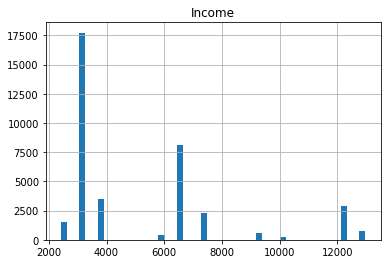

In [129]:
df_Other.hist(column='Income', bins=50);

## Student

In [116]:
#National Living Wage and National Minimum Wage: government response to the Low Pay Commission’s Autumn 2019 recommendations
##https://www.gov.uk/government/publications/national-living-wage-and-national-minimum-wage-government-response-to-the-low-pay-commissions-autumn-2019-recommendations

#Details
# £8.21 for workers aged 25 and over (the National Living Wage)
# £7.70 for 21 to 24-year-olds
# £6.15 for 18 to 20-year-olds
# £4.35 for 16 to 17-year-olds
# £3.90 for apprentices aged under 19 or in the first year of their apprenticeship


#Min and max wage per hours (rounded values)
## Min income refers to te national minimum wage per age.
## Maximum income is an estimate value chosen after several iterations
income_age_16_17 = [4, 6]
income_age_18_20 = [5, 10]
income_age_21_24 = [6, 15]
income_age_25_plus = [8,20]

# min and max hours worked per week:
weekly_working_hours = [5,20]


df_student = df_persons_NE_inactive_5categories.loc[df_persons_NE_inactive_5categories['Occupation'] == 'Student']

df_student['Income'] = 0


for idx_person, person in df_student.iterrows():
    
    
    if (person['Age'] >= 16  and  person['Age'] <= 17):
        
        df_student.at[idx_person,'Income'] = random.randrange(int(income_age_16_17[0]),int(income_age_16_17[1]), 1) * random.randrange(int(weekly_working_hours[0]),int(weekly_working_hours[1]), 1) * 52

    elif (person['Age'] >= 18  and  person['Age'] <= 20):
        
        df_student.at[idx_person,'Income'] = random.randrange(int(income_age_18_20[0]),int(income_age_18_20[1]), 1) * random.randrange(int(weekly_working_hours[0]),int(weekly_working_hours[1]), 1) * 52

    elif (person['Age'] >= 21  and  person['Age'] <= 24):
        
        df_student.at[idx_person,'Income'] = random.randrange(int(income_age_21_24[0]),int(income_age_21_24[1]), 1) * random.randrange(int(weekly_working_hours[0]),int(weekly_working_hours[1]), 1) * 52

    elif (person['Age'] >= 25):
        
        df_student.at[idx_person,'Income'] = random.randrange(int(income_age_25_plus[0]),int(income_age_25_plus[1]), 1) * random.randrange(int(weekly_working_hours[0]),int(weekly_working_hours[1]), 1) * 52

        



C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [117]:
df_student['Income'].min()

1040

In [118]:
df_student['Income'].max()

18772

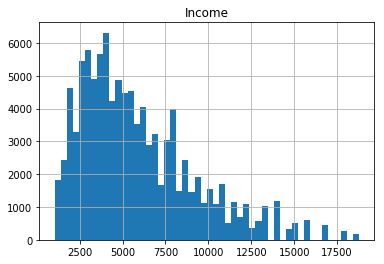

In [130]:
df_student.hist(column='Income', bins=50);

In [120]:
# Concatenate all dataframes updated with the income values:
df_persons_NE_inactive_5categories_income = (pd.concat([df_retired__updated_all, df_sick, df_looking_after, df_Other, df_student]))



In [122]:
# Save dataframe
df_persons_NE_inactive_5categories_income_export_20220306_correct = df_persons_NE_inactive_5categories_income
df_persons_NE_inactive_5categories_income_export_20220306_correct.to_csv(r'C:\Users\b9055315\Documents\PhD_PROJECT\Synthetic_population_developement\SPENSER\Data\2019\income\inactive\df_persons_NE_inactive_5categories_income_export_20220306_correct.csv', encoding='utf-8', header=True)


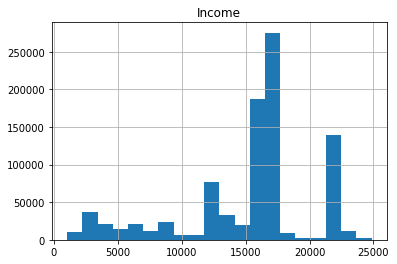

In [135]:
df_persons_NE_inactive_5categories_income.hist(column='Income', bins=20);

In [ ]:
## there are a lot of retired people (age > 65)